In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../..')
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.input_prep.encode import MultiEncoder, OneHotEncoderSeq, RadianEncoder 
from hamp_pred.src.input_prep.encode import RadiousPhobosEncoder
from hamp_pred.src.predictor_config import PredictionConfig 
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper 
from hamp_pred.src.predictor import Predictor

# Preapare data

In [2]:
DATA_DIR = '../../data/input'

# data set contains train and validation sets
# the val set is used for eraly stopping 
data = f'{DATA_DIR}/af_all_params_clean_model1.p'
data = pd.read_pickle(data)
data["P_diff"] = data["n_P"] - data["c_P"]
data["p_diff"] = data["n_p"] - data["c_p"]

assert all(data['train_seq'].str.len() == 22)

# separate test set used to pick the best model
#data_test = f'{DATA_DIR}/af_clean_model_test.p'
#data_test = pd.read_pickle(data_test)

In [15]:
def get_mean_params(data):
    results = []
    for ind, row in data.iterrows():
        results.append([np.mean(row["rot"]), np.mean(row["shift_diff"]), np.mean(row["radius_diff"]), np.mean(row["pitch_diff"])])
    return pd.DataFrame(results, columns=["mean_rot", "mean_shift", "mean_radius", "mean_pitch"])
    


# Compute correlation

In [10]:
expanded_per_helix = data[["rot", "n_shift", "c_shift", "n_radius", "c_radius", "n_pitch", "c_pitch", "n_P", "c_P", "n_p", "c_p"]].explode(["rot", "n_shift", "c_shift", "n_radius", "c_radius", "n_pitch", "c_pitch", "n_P", "c_P", "n_p","c_p"]).reset_index(drop=True).astype("float64")

In [11]:
expanded_helix_diff = data[["rot", "shift_diff", "radius_diff", "pitch_diff", "P_diff", "p_diff"]].explode(["rot", "shift_diff", "radius_diff", "pitch_diff", "P_diff", "p_diff"]).reset_index(drop=True).astype("float64")

In [12]:
corr_frame_per_helix = expanded_per_helix.corr()

In [13]:
corr_frame_helix_diff = expanded_helix_diff.corr()

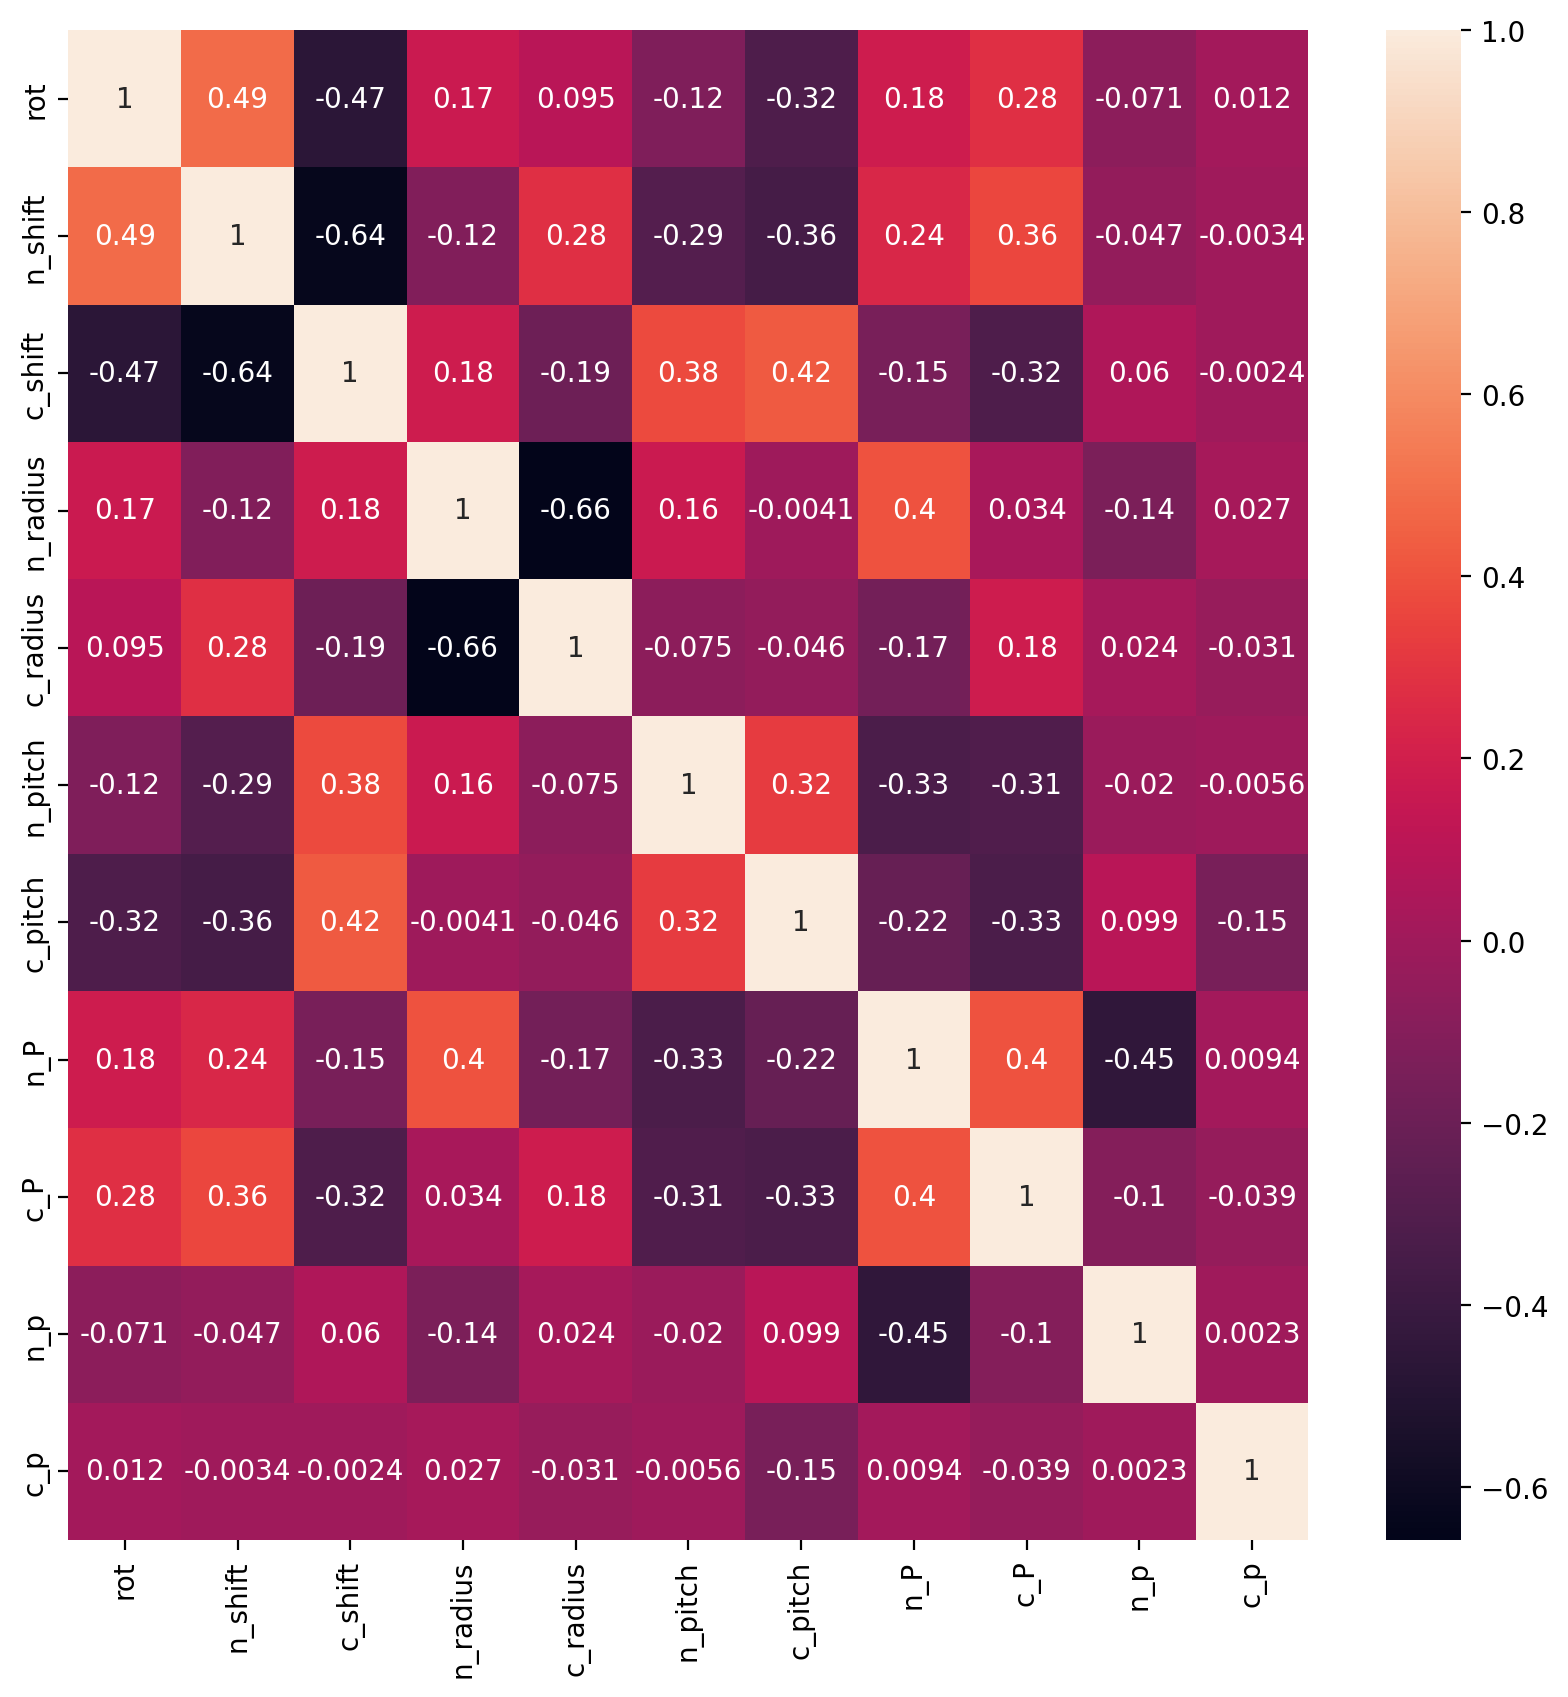

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 10), dpi=200)
sns.heatmap(corr_frame_per_helix, annot=True, ax=ax)
plt.show()

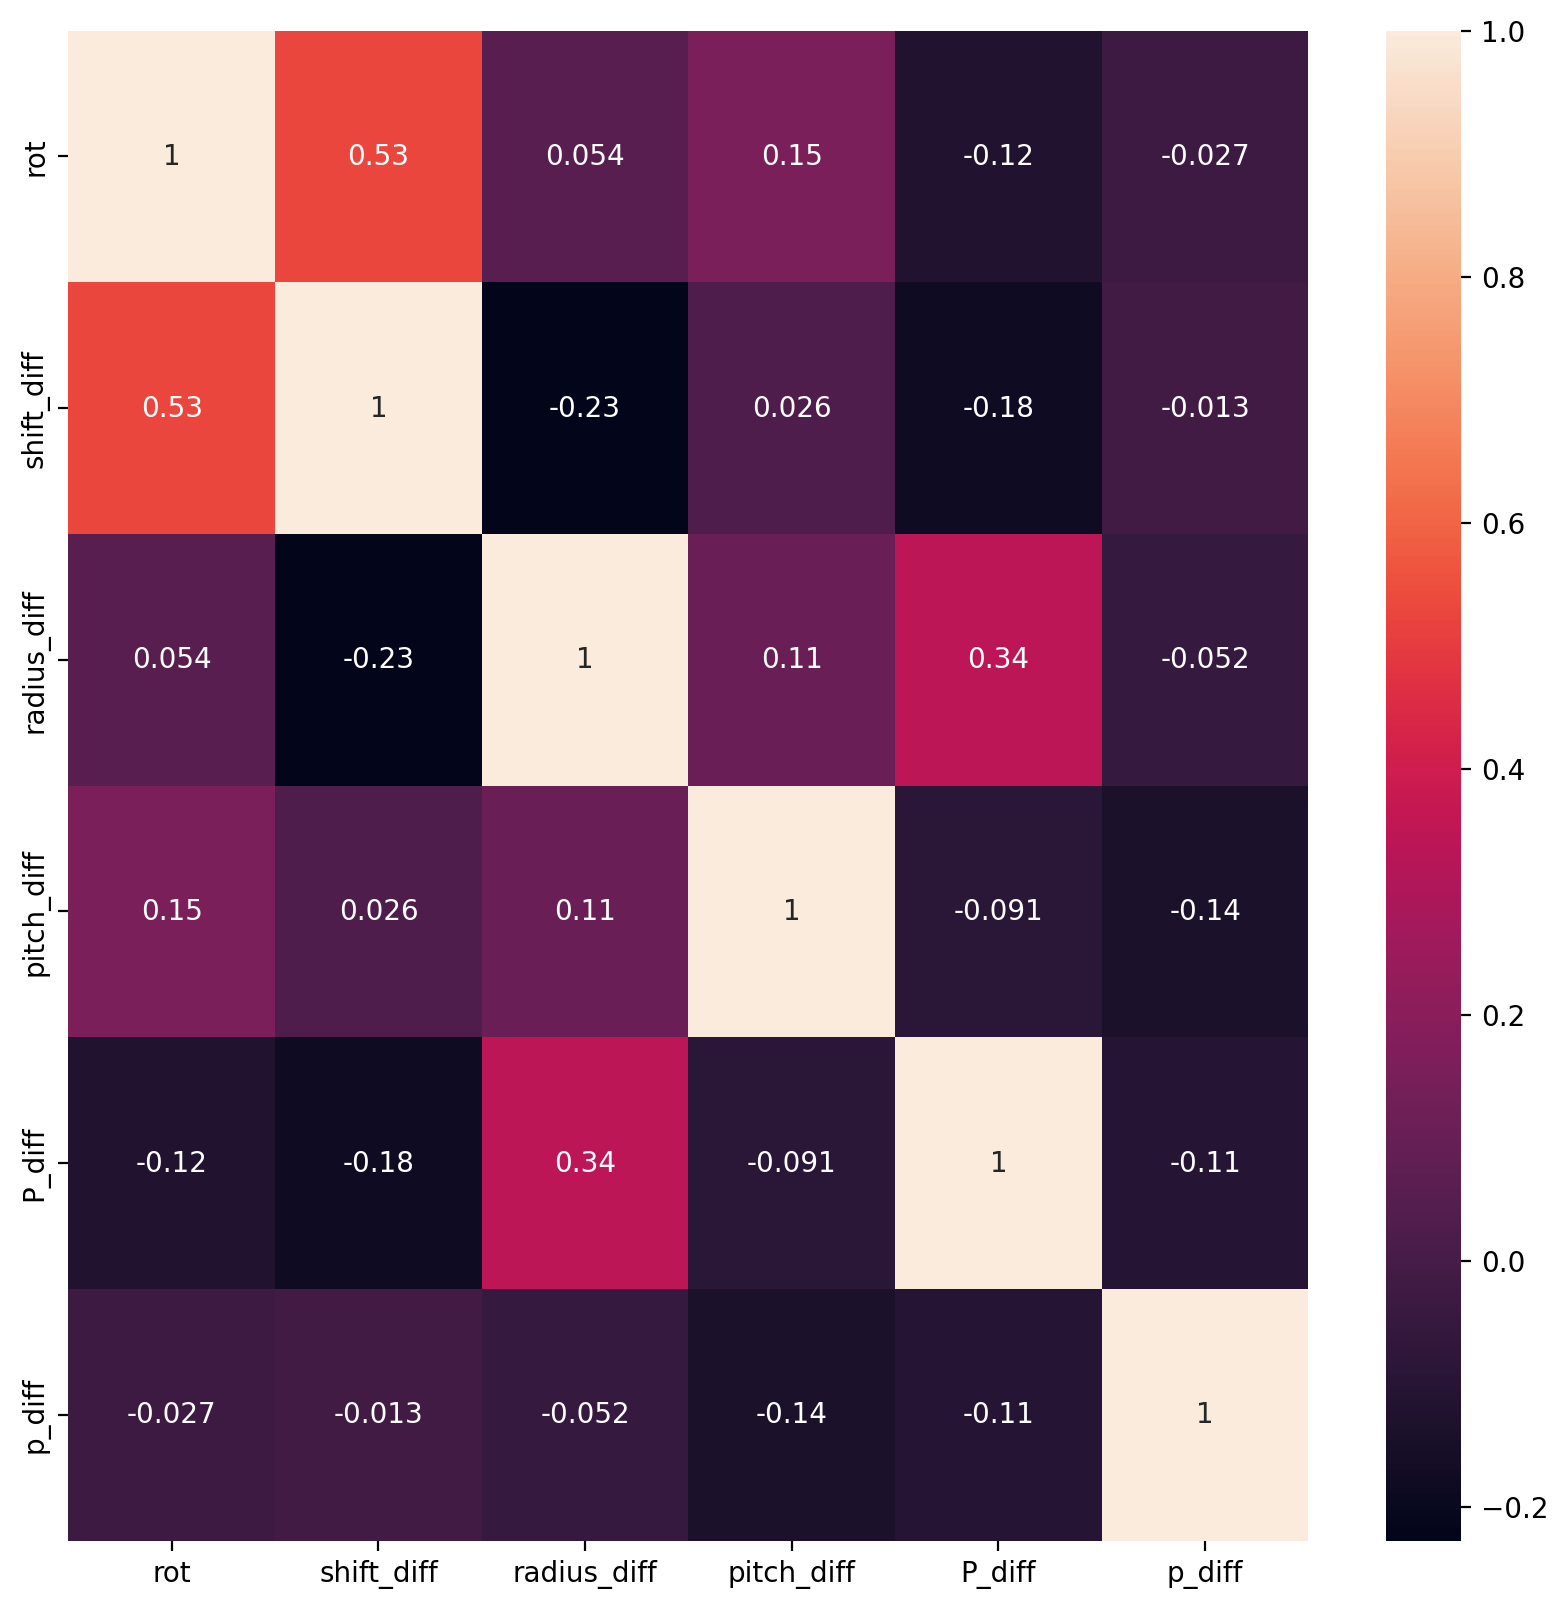

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10, 10), dpi=200)
sns.heatmap(corr_frame_helix_diff, annot=True)
plt.show()